#Common Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc, roc_auc_score

import os
from PIL import Image
import skimage

from google.colab import drive #upload files from GoogleDrive
import tarfile #extract tgz files

# to make this notebook's output stable across runs
np.random.seed(42)

#Upload EnglishImg.tgz File from Google Drive

In [ ]:
try:
    drive.mount('/content/drive')  # Connect Google Drive
    file_path = '/content/drive/MyDrive/EnglishImg.tgz' # Define the file path in my Google Drive

    print("Successfully uploaded 'EnglishImg.tgz' from my Google Drive")

except Exception as e:
    print(f"An error occurred: {e}")


Mounted at /content/drive
Successfully uploaded 'EnglishImg.tgz' from my Google Drive


# Extract the EnglishImg.tgz File

In [ ]:
#extract the EnglishImg.tgz to  EnglishImg
extracted_directory = 'EnglishImg'

try:
    # Create the directory if it doesn't exist
    if not os.path.exists(extracted_directory):
        os.makedirs(extracted_directory)

    # Open the EnglishImg.tgz file and Extract its contents to the new directory (extracted_directory = 'EnglishImg')
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path=extracted_directory)

    print(f"Successfully extracted 'EnglishImg.tgz' to '{extracted_directory}'")

except Exception as e:
    print(f"An error occurred: {e}")

Successfully extracted 'EnglishImg.tgz' to 'EnglishImg'


#1.1 Getting Started

## Helper Function that assign a Label for each sample according to its FolderName using ascii code

#### For numbers 1 to 10, we map them to strings '0' to '9'.
#### For numbers 11 to 36, we map them to uppercase letters 'A' to 'Z'. (+54)
#### For numbers 37 to 62, we map them to lowercase letters 'a' to 'z'. (+60)

In [ ]:
def extract_and_map_number_to_label(filename):

    number_str = filename[6:]    # Extract the numeric part
    number_str = number_str.lstrip('0')  # Remove leading zeros if any
    number = int(number_str)  # Convert the number string to an integer

    # Map the number to the corresponding label
    if 1 <= number <= 10:
        return number - 1         # Map 1 to 0, 2 to 1, ..., 10 to 9
    elif 11 <= number <= 36:
        return chr(number + 54)  # Map 11 to 'A', 12 to 'B', ..., 36 to 'Z'
    elif 37 <= number <= 62:
        return chr(number + 60)  # Map 37 to 'a', 38 to 'b', ..., 62 to 'z'

### Test Function

In [ ]:
# Generate filenames from "Sample001" to "Sample062"
filenames = [f"Sample{i:03d}" for i in range(1, 63)]

# Extract and map labels for each filename
labels = [extract_and_map_number_to_label(filename) for filename in filenames]

# Print the filenames and their corresponding labels
for filename, label in zip(filenames, labels):
    print(f"Filename: {filename}, Label: {label}")

Filename: Sample001, Label: 0
Filename: Sample002, Label: 1
Filename: Sample003, Label: 2
Filename: Sample004, Label: 3
Filename: Sample005, Label: 4
Filename: Sample006, Label: 5
Filename: Sample007, Label: 6
Filename: Sample008, Label: 7
Filename: Sample009, Label: 8
Filename: Sample010, Label: 9
Filename: Sample011, Label: A
Filename: Sample012, Label: B
Filename: Sample013, Label: C
Filename: Sample014, Label: D
Filename: Sample015, Label: E
Filename: Sample016, Label: F
Filename: Sample017, Label: G
Filename: Sample018, Label: H
Filename: Sample019, Label: I
Filename: Sample020, Label: J
Filename: Sample021, Label: K
Filename: Sample022, Label: L
Filename: Sample023, Label: M
Filename: Sample024, Label: N
Filename: Sample025, Label: O
Filename: Sample026, Label: P
Filename: Sample027, Label: Q
Filename: Sample028, Label: R
Filename: Sample029, Label: S
Filename: Sample030, Label: T
Filename: Sample031, Label: U
Filename: Sample032, Label: V
Filename: Sample033, Label: W
Filename: 

## Reading the Samples and assgin Labels

In [ ]:
# Define the path
english_img_directory = 'EnglishImg/English/Img/GoodImg/Bmp'

# Define the paths for the subfolders for digit 4 and characters A,u,H
subfolder_paths = {
    'Sample005': extract_and_map_number_to_label('Sample005'),
    'Sample011': extract_and_map_number_to_label('Sample011'),
    'Sample057': extract_and_map_number_to_label('Sample057'),
    'Sample018': extract_and_map_number_to_label('Sample018')
}

subfolder_paths

{'Sample005': 4, 'Sample011': 'A', 'Sample057': 'u', 'Sample018': 'H'}

In [ ]:
data = []
labels = []

# Iterate over the subfolders and their corresponding labels
for subfolder, label in subfolder_paths.items():
    subfolder_path = os.path.join(english_img_directory, subfolder)

    # Iterate over the images in the subfolder of each digits or char
    for filename in os.listdir(subfolder_path):

      # Load and preprocess the image
      image_path = os.path.join(subfolder_path, filename)
      image = Image.open(image_path)
      image = image.resize((64, 64))

      # Convert the resized image to grayscale
      grayscale_image = image.convert('L')

      # Convert the image to a numpy array
      image_array = np.array(grayscale_image)

      # Flatten the 2D array into a 1D array and append it to the data list
      image_data = image_array.ravel()

      data.append(image_data)
      labels.append(label)  # Append the corresponding label

# Convert the lists to NumPy arrays
data_np = np.array(data)
labels_np = np.array(labels)

# Join the label for each image to its data along the columns (axis 1)
data_with_labels = np.column_stack((data_np, labels_np))

# Print the shape of the combined array
print(f"Combined array shape: {data_with_labels.shape}\n")

# Convert the NumPy array to a Pandas DataFrame
df = pd.DataFrame(data_with_labels)
df = df.rename(columns={df.columns[-1]: 'Label'})
df


Combined array shape: (839, 4097)



,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,Label
0,152,154,154,155,154,153,153,154,156,155,...,173,172,172,173,172,171,172,173,174,4
1,193,193,192,191,189,191,193,194,193,192,...,64,55,64,89,125,157,171,167,156,4
2,60,63,63,62,61,62,62,60,59,63,...,91,62,76,71,66,67,68,66,65,4
3,62,62,63,63,60,61,63,63,63,63,...,66,67,66,64,63,63,64,64,64,4
4,56,56,53,56,56,59,60,62,63,67,...,51,50,49,53,52,51,54,52,50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,31,37,43,46,39,30,29,30,30,30,...,42,43,41,38,39,38,38,38,37,H
835,146,145,144,146,146,146,149,150,148,148,...,132,133,135,135,131,132,135,129,133,H
836,72,71,71,65,71,73,71,68,66,74,...,60,64,65,70,63,66,62,67,64,H
837,64,64,59,52,77,110,132,153,173,179,...,88,53,56,52,50,56,55,56,56,H


#Helper function to convert X--> from numpy to numeric ,y--> Label encoder 0-->4 ,1-->A
###return X(from numpy to float32) ,Encode y (4-->0 , A-->1 ,H-->2 ,u-->3)

In [ ]:
def to_numeric (X,y):
  X = X.astype(np.float32)

  # Transform the labels to numeric values
  label_encoder = LabelEncoder()
  y_encoded = label_encoder.fit_transform(y)
  print("Transformed labels:", y_encoded)

  print("\nX dtype:", X.dtype)
  print("Y dtype:", y_encoded.dtype)

  return X,y_encoded

#1.2 Binary Classifiers

In [ ]:
# Define the target classes
target_classes = ['4', 'A']

##Helper Funtions

### Fuction to run LogisticRegression model given any x_train,y_train_x_test
### return y_train_pred,y_test_pred

In [ ]:
def LogisticRegression_Model (X_train, y_train,X_test):

  logistic_model = LogisticRegression(max_iter=10, tol=0.1, solver='liblinear')
  logistic_model.fit(X_train, y_train)

  y_train_pred = logistic_model.predict(X_train) # Predict labels for the training data
  y_test_pred = logistic_model.predict(X_test)  # Predict labels for the testing data

  return y_train_pred,y_test_pred


### Evalution Function that calcualte confusion matrix (without using any scikit-learn function)to calualte accuracy,recall and precision given actual y , the predict y and text(Train/Test).
### Return TP, TF, FP, FN ,accuracy,recall and precision,ROC curve

In [ ]:
def Binary_Evalution(y, y_pred,text):

  TP = TN = FP = FN= 0

  # Calculate the confusion matrix elements
  for true_label, predicted_label in zip(y, y_pred):
      if true_label == 1 and predicted_label == 1:
          TP+= 1
      elif true_label == 0 and predicted_label == 0:
          TN += 1
      elif true_label == 0 and predicted_label == 1:
          FP += 1
      elif true_label == 1 and predicted_label == 0:
          FN += 1

  # Print the confusion matrix and metrics
  print(f"\n{text} Data Metrics:\n")
  print("Confusion Matrix:")
  print(f"True Positives (TP): {TP}")
  print(f"True Negatives (TN): {TN}")
  print(f"False Positives (FP): {FP}")
  print(f"False Negatives (FN): {FN}")

  accuracy= (TP + TN) / (TP + TN+ FP + FN)  # Calculate accuracy
  recall = TP / (TP + FN)   # Calculate recall
  precision = TP / (TP + FP)  # Calculate precision

  # Print accuracy, recall, and precision
  print(f"\n\nAccuracy for {text} data: {accuracy*100:.2f}%")
  print(f"Recall for {text} data: {recall*100:.2f}%")
  print(f"Precision for {text} data: {precision*100:.2f}% \n\n")

  # Confusion Matrix
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize=(4, 3))
  sns.heatmap(cm, annot=True, cmap='Pastel2', fmt='g', xticklabels=target_classes, yticklabels=target_classes)
  plt.title(f"{text} Confusion Matrix")
  plt.xlabel('Predicted Labels')
  plt.ylabel('Actual Labels')

  plt.tight_layout()
  plt.show()
  print('\n')

  # ROC Curve
  fpr, tpr, _ = roc_curve(y, y_pred)
  roc_auc = auc(fpr, tpr)

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
  plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for {text} Data')
  plt.legend(loc="lower right")
  plt.show()

## Filtering the images to apply binary classifiers on 'A' and '4' Labels

In [ ]:
# Get the images with Label = A or 4 from data_with_labels (numpy array)
filtered_data = data_with_labels[(data_with_labels[:, -1] == 'A') | (data_with_labels[:, -1] == '4')]

# Print the shape of the filtered data
print(f"Filtered data shape: {filtered_data.shape}\n")

# Convert the NumPy array to a Pandas DataFrame
df = pd.DataFrame(filtered_data)
df = df.rename(columns={df.columns[-1]: 'Label'})
df

Filtered data shape: (605, 4097)



,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,Label
0,152,154,154,155,154,153,153,154,156,155,...,173,172,172,173,172,171,172,173,174,4
1,193,193,192,191,189,191,193,194,193,192,...,64,55,64,89,125,157,171,167,156,4
2,60,63,63,62,61,62,62,60,59,63,...,91,62,76,71,66,67,68,66,65,4
3,62,62,63,63,60,61,63,63,63,63,...,66,67,66,64,63,63,64,64,64,4
4,56,56,53,56,56,59,60,62,63,67,...,51,50,49,53,52,51,54,52,50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,74,74,74,73,73,72,72,73,73,73,...,189,189,189,190,192,194,197,198,198,A
601,177,181,182,182,183,184,187,187,185,185,...,186,185,184,184,185,188,193,195,195,A
602,183,186,190,195,197,193,191,190,189,189,...,190,190,191,190,190,190,191,190,189,A
603,109,109,109,108,108,107,108,109,109,107,...,206,205,206,204,201,198,198,198,197,A


## is the Data Balanced?

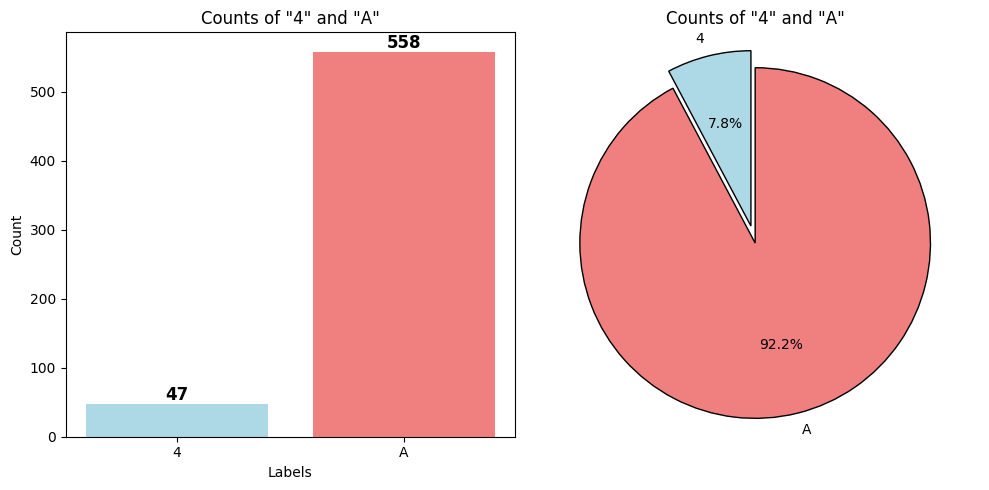

In [ ]:
# Count the number of 'A' and '4' cases
label_counts = np.unique(filtered_data[:, -1], return_counts=True)
labels = label_counts[0]
values = label_counts[1]

# Create a figure with one row and two columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the bar chart on the first subplot (axes[0])
axes[0].bar(labels, values, color=['lightblue', 'lightcoral'])
for i, v in enumerate(values):
    axes[0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold', fontsize=12)

axes[0].set_title('Counts of "4" and "A"')
axes[0].set_xlabel('Labels')
axes[0].set_ylabel('Count')

# Create a pie chart on the second subplot (axes[1])
axes[1].pie(values, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=['lightblue', 'lightcoral'],
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[1].set_title('Counts of "4" and "A"')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


## Getting X (feature matrix) and y (Label--> Target)


In [ ]:
X = filtered_data[:, :-1]  # features
y = filtered_data[:, -1]   # Labels

# Print the shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

print("X dtype:", X.dtype)
print("Y dtype:", y.dtype)


X shape: (605, 4096)
y shape: (605,)
X dtype: <U21
Y dtype: <U21


##Splitting 60% Train, 20% validation , 20% Test
#### A 60-20-20 split ratio, with 60% for training and 20% each for testing and validation, is ideal for small datasets. It balances effective model learning with rigorous evaluation, ensuring that the model captures patterns, performs well on unseen data, and can be fine-tuned effectively.

###Use train_test_split (Selecting images at random)

In [ ]:
# Combine X and y into a single array
combined_data = np.column_stack((X, y))

# Shuffle the combined data
np.random.shuffle(combined_data)

# Split the shuffled data back into X and y
shuffled_X = combined_data[:, :-1]
shuffled_y = combined_data[:, -1]

shuffled_X,shuffled_y=to_numeric (shuffled_X,shuffled_y)

Transformed labels: [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 

In [ ]:
X_train_random, X_temp_random, y_train_random, y_temp_random= train_test_split(shuffled_X, shuffled_y, test_size=0.4, random_state=42)
X_val_random, X_test_random, y_val_random, y_test_random = train_test_split(X_temp_random, y_temp_random, test_size=0.5, random_state=42)

# Print the number of samples in each split
print("Number of training samples:", len(X_train_random))
print("Number of validation samples:", len(X_val_random))
print("Number of test samples:", len(X_test_random))

Number of training samples: 363
Number of validation samples: 121
Number of test samples: 121


In [ ]:
y_train_pred_random,y_test_pred_random=LogisticRegression_Model (X_train_random, y_train_random,X_test_random)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Evaluation on training


Training Data Metrics:

Confusion Matrix:
True Positives (TP): 337
True Negatives (TN): 26
False Positives (FP): 0
False Negatives (FN): 0


Accuracy for Training data: 100.00%
Recall for Training data: 100.00%
Precision for Training data: 100.00% 




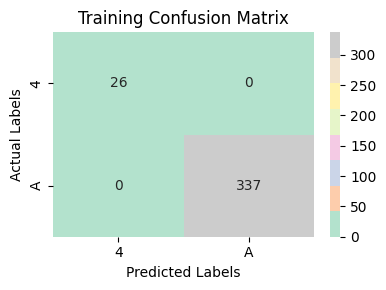

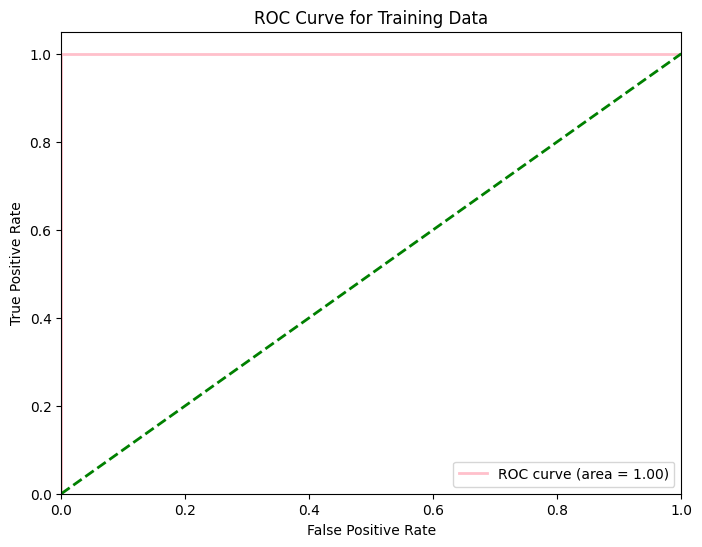

In [ ]:
Binary_Evalution(y_train_random, y_train_pred_random,'Training')

#### Evaluation on testing


Testing Data Metrics:

Confusion Matrix:
True Positives (TP): 107
True Negatives (TN): 3
False Positives (FP): 7
False Negatives (FN): 4


Accuracy for Testing data: 90.91%
Recall for Testing data: 96.40%
Precision for Testing data: 93.86% 




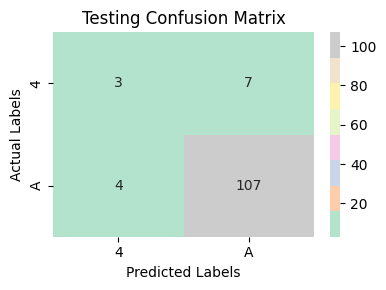

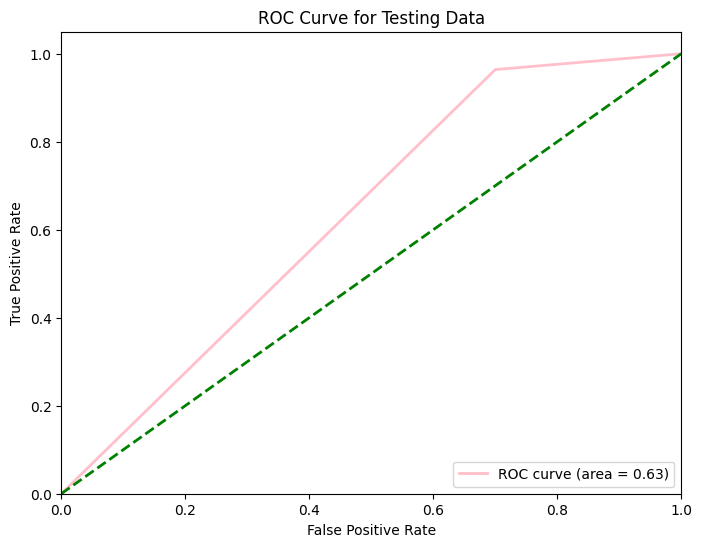

In [ ]:
Binary_Evalution(y_test_random, y_test_pred_random,'Testing')

###Use train_test_split(Stratified Sampling)
####When dealing with imbalanced data containing different classes, such as 'A' and '4', it's important to use stratified sampling during the train-test split. Stratified sampling ensures that both the training and testing sets have a class distribution that closely matches the overall distribution in the dataset. This helps prevent biases in the machine learning model, ensures fair evaluation, and improves generalization to new data. In my specific case, where I have significantly more 'A' samples than '4' samples, using stratified sampling is crucial to achieving accurate and reliable results in the machine learning tasks.







In [ ]:
X,y_encoded=to_numeric (X,y)

Transformed labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print the number of samples in each split
print("Number of training samples:", len(X_train))
print("Number of validation samples:", len(X_val))
print("Number of test samples:", len(X_test))

Number of training samples: 363
Number of validation samples: 121
Number of test samples: 121


In [ ]:
y_train_pred,y_test_pred=LogisticRegression_Model (X_train, y_train,X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Evaluation on training


Training Data Metrics:

Confusion Matrix:
True Positives (TP): 335
True Negatives (TN): 25
False Positives (FP): 3
False Negatives (FN): 0


Accuracy for Training data: 99.17%
Recall for Training data: 100.00%
Precision for Training data: 99.11% 




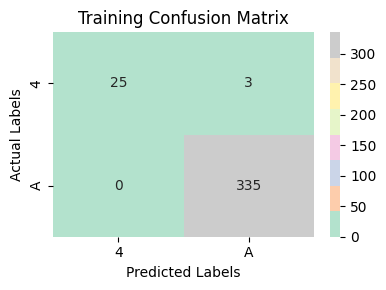

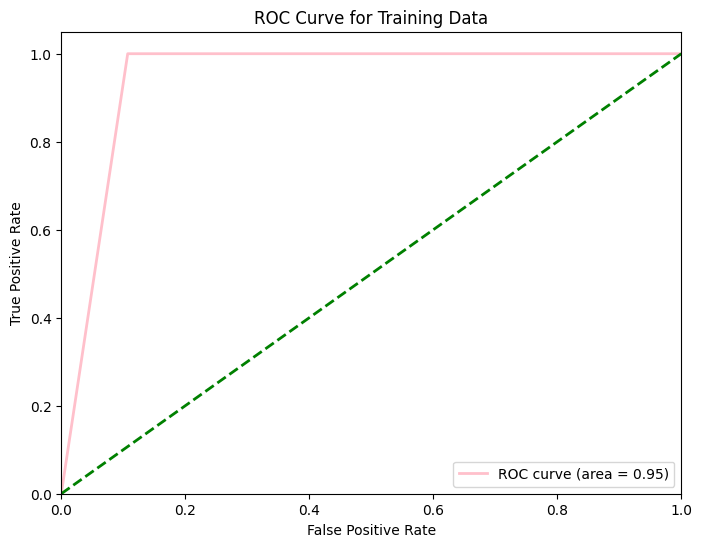

In [ ]:
Binary_Evalution(y_train, y_train_pred,'Training')

#### Evaluation on testing


Testing Data Metrics:

Confusion Matrix:
True Positives (TP): 106
True Negatives (TN): 4
False Positives (FP): 6
False Negatives (FN): 5


Accuracy for Testing data: 90.91%
Recall for Testing data: 95.50%
Precision for Testing data: 94.64% 




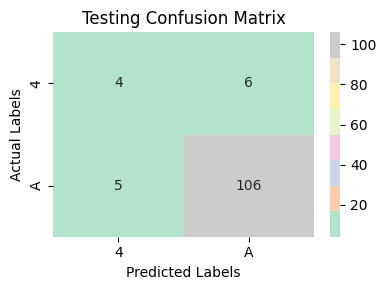

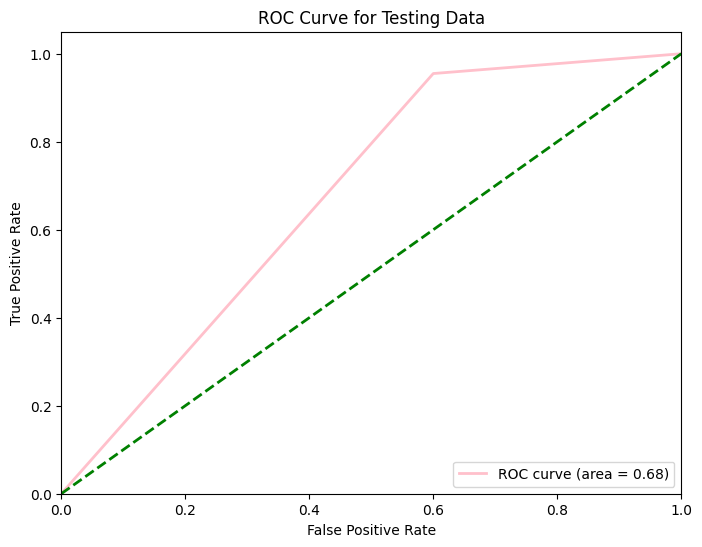

In [ ]:
Binary_Evalution(y_test, y_test_pred,'Testing')

#Result Explanation
####When shuffling the data without using stratified sampling, there's a risk of creating training and testing sets with significantly imbalanced class distributions. This randomness can lead to variable model performance, where the model may perform exceptionally well on the training data but poorly on the testing data, especially if it overfits to the majority class.

####On the other hand, when using stratified sampling without shuffling, the class balance is maintained in both the training and testing sets. This approach ensures that each class is represented proportionally in both sets, leading to more consistent and reliable model performance metrics. The model trained with stratified sampling is likely to generalize better to unseen data, resulting in more stable and consistent results.

#1.3 Multiclass Classifier



In [ ]:
# Define the target classes
target_classes = ['4', 'A', 'H', 'u']

##Helper Funtions

### Fuction to run Multi classfier model given any x_train,y_train_x_test
### return y_train_pred,y_test_pred

In [ ]:
def MLC_Model(X_train, y_train, X_test):

    mlc = LogisticRegression(multi_class='ovr')
    mlc.fit(X_train, y_train)

    y_train_pred = mlc.predict(X_train)  # Predict labels for the training data
    y_test_pred = mlc.predict(X_test)    # Predict labels for the testing data

    return y_train_pred, y_test_pred

### Evalution Function that calcualte confusion matrix to calualte accuracy, average recall precision and F1 score given actual y , the predict y and text(Train/Test).
### Return accuracy, average recall precision and F1 score

In [ ]:
def MLC_Evalution(y, y_pred,text):
  TP = TN = FP = FN= 0

  # Calculate confusion matrices  manually
  cm = np.zeros((len(target_classes), len(target_classes)), dtype=int)

  for i in range(len(y)):
    cm[y[i]][y_pred[i]] += 1

  # Calculate accuracy
  accuracy = np.sum(np.diag(cm)) / np.sum(cm)

  # Calculate average recall, precision, and F1 score
  recall = np.mean(np.diag(cm) / np.sum(cm, axis=1))

  precision = np.mean(np.diag(cm) / np.sum(cm, axis=0))

  f1 = 2 * (precision * recall) / (precision +recall)

  # Print metrics
  print(f"{text} Set Metrics:")
  print(f"Accuracy: {accuracy*100:.2f}")
  print(f"Average Recall: {recall*100:.2f}")
  print(f"Average Precision: {precision*100:.2f}")
  print(f"F1 Score: {f1*100:.2f}")

  # Confusion Matrix
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize=(4, 3))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel2', xticklabels=target_classes, yticklabels=target_classes)
  plt.title(f"{text} Confusion Matrix")
  plt.xlabel('Predicted Labels')
  plt.ylabel('Actual Labels')

  plt.tight_layout()
  plt.show()
  print('\n')


## is the Data Balanced?

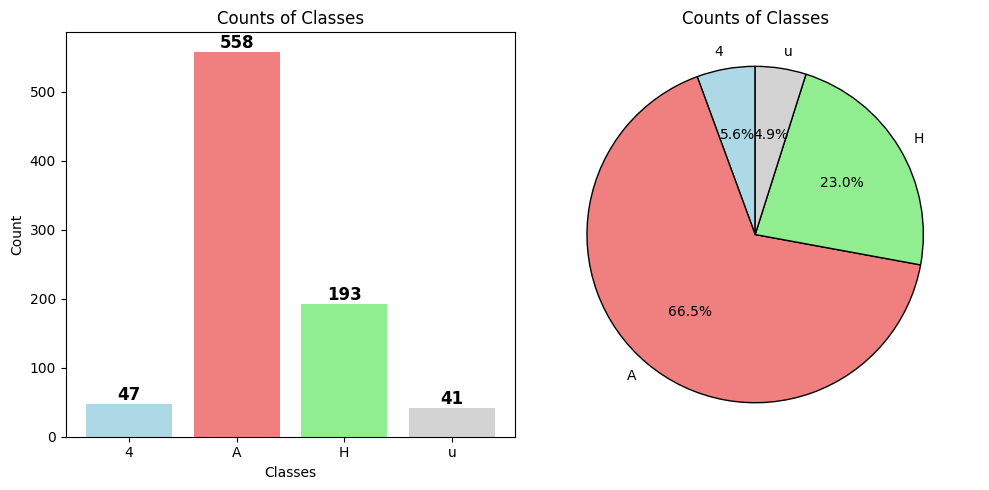

In [ ]:
# Count the number of occurrences for each target class
label_counts = np.unique(data_with_labels[:, -1], return_counts=True)
labels = label_counts[0]
values = label_counts[1]

# Initialize filtered_values with zeros
filtered_values = [0] * len(target_classes)

# Iterate through target_classes and update filtered_values if the class exists
for i, cls in enumerate(target_classes):
    if cls in labels:
        index = np.where(labels == cls)[0][0]
        filtered_values[i] = values[index]

# Create a figure with one row and two columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the bar chart on the first subplot (axes[0])
axes[0].bar(target_classes, filtered_values, color=['lightblue', 'lightcoral', 'lightgreen', 'lightgrey'])
for i, v in enumerate(filtered_values):
    axes[0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold', fontsize=12)

axes[0].set_title('Counts of Classes')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Count')

# Create a pie chart on the second subplot (axes[1])
axes[1].pie(filtered_values, labels=target_classes, autopct='%1.1f%%', startangle=90,
            colors=['lightblue', 'lightcoral', 'lightgreen', 'lightgrey'],
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[1].set_title('Counts of Classes')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


## Getting X (feature matrix) and y (Label--> Target)


In [ ]:
X_MLC = data_with_labels[:, :-1]  # features
y_MLC = data_with_labels[:, -1]   # Labels

# Print the shapes of X and y
print("X shape:", X_MLC.shape)
print("y shape:", y_MLC.shape)

print("X dtype:", X_MLC.dtype)
print("Y dtype:", y_MLC.dtype)


X shape: (839, 4096)
y shape: (839,)
X dtype: <U21
Y dtype: <U21


##Splitting 60% Train, 20% validation , 20% Test
For the same reason above


###Use train_test_split (Selecting images at random)

In [ ]:
# Combine X and y into a single array
combined_data = np.column_stack((X_MLC, y_MLC))

# Shuffle the combined data
np.random.shuffle(combined_data)

# Split the shuffled data back into X and y
shuffled_X = combined_data[:, :-1]
shuffled_y = combined_data[:, -1]

shuffled_X,shuffled_y=to_numeric (shuffled_X,shuffled_y)


# Count the occurrences of each class (0, 1, 2, 3)
class_counts = np.bincount(shuffled_y)
for i, count in enumerate(class_counts):
    print(f"Class {i}: Count = {count}")
# class 4-->0 , class A-->1 ,class H-->2 ,class u-->3


Transformed labels: [1 2 3 1 2 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 3 2 1 0 1 1 1 1 1 1 1 2 1 3 2 3 2
 1 1 1 1 2 1 1 1 3 2 2 1 1 2 2 1 1 1 0 2 2 1 1 2 1 2 1 1 1 1 1 1 1 0 1 1 2
 1 1 3 3 3 1 1 2 1 1 2 1 1 1 2 1 1 0 1 1 1 2 1 2 1 1 2 1 1 1 0 1 1 1 1 2 1
 1 2 1 1 3 1 1 1 1 1 0 1 1 2 1 1 2 3 0 1 0 1 2 1 1 1 2 1 3 2 1 2 2 1 2 2 1
 2 2 1 1 1 0 1 2 1 0 2 1 1 1 1 1 1 2 0 1 3 2 3 1 2 0 3 2 1 2 1 1 1 1 1 0 1
 1 0 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1
 1 1 2 2 3 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 3 1 1 1 2 1 1 1 2
 1 0 0 1 1 0 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 2 3 2 1 1 1 1 1 2 1 0 1 1 2
 1 1 1 3 1 2 2 1 1 2 1 1 2 1 2 2 1 3 1 1 1 2 3 1 1 3 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 3 1 2 1 1 1 2 1 1 1 1 1 1 3 1 1 1 1 1 1 1
 3 3 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 2 2 2 1 1 1
 1 0 1 1 1 3 2 2 0 1 1 2 1 2 2 1 2 3 2 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 0 1
 1 1 1 2 1 1 2 1 1 3 2 3 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 0 1 1 3 1 1 2 2 2 1
 2 1 

In [ ]:
X_train_random, X_temp_random, y_train_random, y_temp_random= train_test_split(shuffled_X, shuffled_y, test_size=0.4, random_state=42)
X_val_random, X_test_random, y_val_random, y_test_random = train_test_split(X_temp_random, y_temp_random, test_size=0.5, random_state=42)

# Print the number of samples in each split
print("Number of training samples:", len(X_train_random))
print("Number of validation samples:", len(X_val_random))
print("Number of test samples:", len(X_test_random))

Number of training samples: 503
Number of validation samples: 168
Number of test samples: 168


In [ ]:
y_train_pred_random,y_test_pred_random=MLC_Model(X_train_random, y_train_random,X_test_random)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Evaluation on training

Training Set Metrics:
Accuracy: 99.60
Average Recall: 99.56
Average Precision: 99.85
F1 Score: 99.70


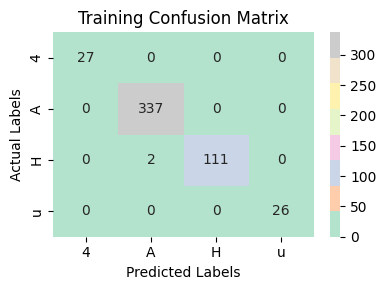

In [ ]:
MLC_Evalution(y_train_random, y_train_pred_random,'Training')

#### Evaluation on testing

Testing Set Metrics:
Accuracy: 58.33
Average Recall: 39.08
Average Precision: 37.92
F1 Score: 38.49


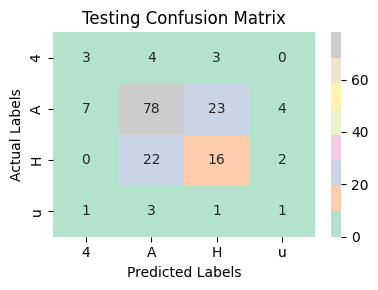

In [ ]:
MLC_Evalution(y_test_random, y_test_pred_random,'Testing')

###Use train_test_split(Stratified Sampling)





In [ ]:
X_MLC,y_MLC_encoded=to_numeric (X_MLC,y_MLC)

Transformed labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X_MLC, y_MLC_encoded, test_size=0.4, random_state=42, stratify=y_MLC_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print the number of samples in each split
print("Number of training samples:", len(X_train))
print("Number of validation samples:", len(X_val))
print("Number of test samples:", len(X_test))

Number of training samples: 503
Number of validation samples: 168
Number of test samples: 168


In [ ]:
y_train_pred,y_test_pred=MLC_Model (X_train, y_train,X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Evaluation on training

Training Set Metrics:
Accuracy: 98.81
Average Recall: 98.71
Average Precision: 99.56
F1 Score: 99.13


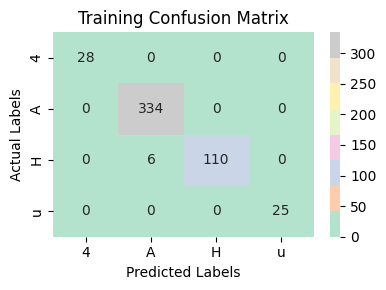

In [ ]:
MLC_Evalution(y_train, y_train_pred,'Training')

#### Evaluation on testing

Testing Set Metrics:
Accuracy: 49.40
Average Recall: 36.81
Average Precision: 34.98
F1 Score: 35.87


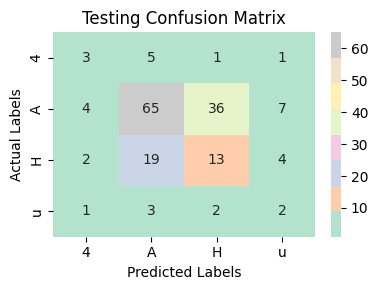

In [ ]:
MLC_Evalution(y_test, y_test_pred,'Testing')

#Result Explanation
####In the multiclass classification task using a Logistic Regression classifier with the 'one-vs-rest' (OvR) strategy and four target classes ('4', 'A', 'H', and 'u'), the performance of the classifier is influenced by class imbalance.

####-Class Imbalance: The dataset exhibits significant class imbalance, with 'A' having the largest number of samples (558), 'H' having 193 samples, '4' having 47 samples, and 'u' having 41 samples.

####-Easier vs. More Difficult Classes:Easier Classes: The classifier performs very well on the majority classes 'A' and 'H' in both training scenarios. These classes have larger sample sizes, and the model effectively learns to classify them.

####-More Difficult Classes: The minority classes '4' and 'u' are more challenging for the classifier. In both training scenarios, the model struggles to correctly classify these classes, resulting in lower accuracy, average recall, average precision, and F1 scores for these classes.

####-Confusion: The classifier tends to confuse the minority classes ('4' and 'u') with the majority classes ('A' and 'H'). This confusion is evident from the lower average recall and precision scores for these minority classes.

####-Impact of Stratified Sampling: Stratified sampling helps maintain class balance in the training set without significantly impacting overall performance. It results in slightly lower accuracy on the training data but maintains good average recall, average precision, and F1 scores.

####-Challenges on Testing Data: On the testing data, regardless of stratified sampling, the classifier faces difficulties in generalization, especially for the minority classes. This indicates that the model struggles to perform well on unseen data, particularly for underrepresented classes.